In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [1]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transforms.ToTensor())

100%|██████████| 170M/170M [00:04<00:00, 38.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [6]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
3


## Visualise data

In [7]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [8]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [9]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


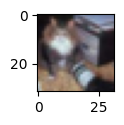

In [10]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [11]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

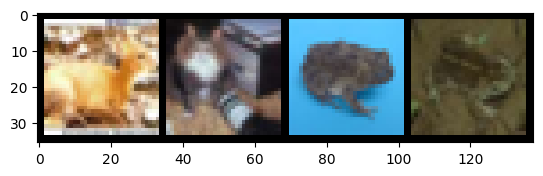

deer cat frog frog


In [12]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [16]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))

    def forward(self, x):
        x = self.conv1(x)
        return x

In [17]:
net = FirstCNN()

In [18]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [19]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [20]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


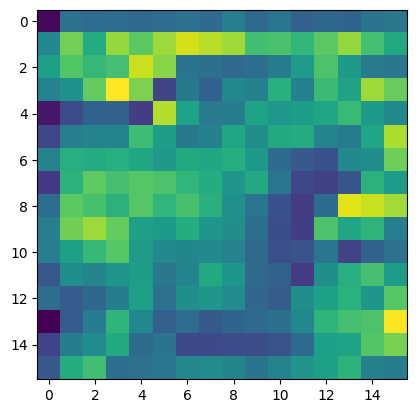

In [21]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [22]:
class FirstCNN_v2(nn.Module):
    def __init__(self):
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [23]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

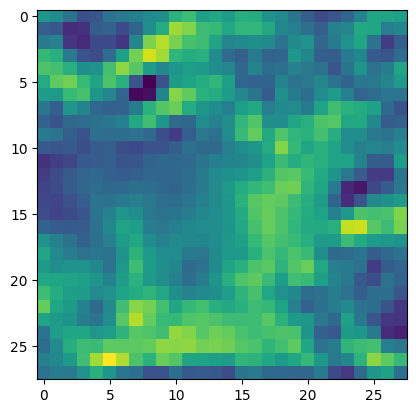

In [24]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [25]:
class FirstCNN_v3(nn.Module):
    def __init__(self):
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [26]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

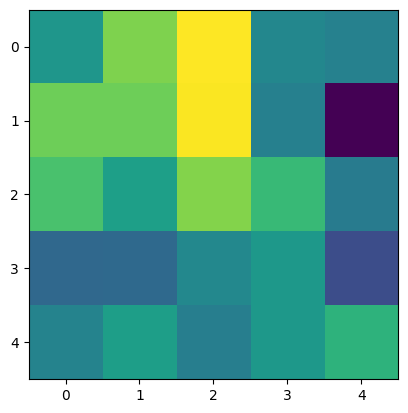

In [27]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [28]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )

    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [29]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [30]:
print(out)

tensor([[ 0.0052,  0.1564,  0.1605,  0.0939,  0.1289, -0.1057,  0.0576,  0.0486,
          0.0042, -0.0343],
        [ 0.0033,  0.1111,  0.1552,  0.0593,  0.1305, -0.0850,  0.0333,  0.0326,
          0.0168, -0.0149],
        [ 0.0060,  0.1285,  0.1682,  0.0716,  0.1211, -0.0916,  0.0581,  0.0037,
          0.0276, -0.0075],
        [-0.0008,  0.1195,  0.1542,  0.0622,  0.1150, -0.0736,  0.0399,  0.0265,
          0.0395, -0.0035]], grad_fn=<AddmmBackward0>)


In [31]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([2, 2, 2, 2])


## Training LeNet

In [32]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [33]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [34]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [35]:
net = LeNet()

In [36]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [37]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))


plt.plot(loss_epoch_arr)
plt.show()

Epoch: 0/16, Test acc: 37.26, Train acc: 37.70


KeyboardInterrupt: 

## Move to GPU

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [39]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [40]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [41]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 2min, sys: 505 ms, total: 2min 1s
Wall time: 2min 2s


In [42]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 56.31, Train acc: 64.42


## Basic Visualisation

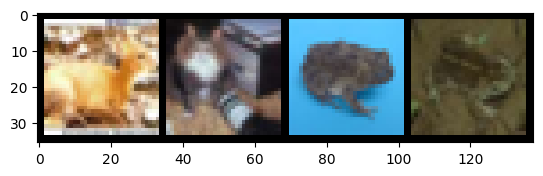

In [43]:
imshow(torchvision.utils.make_grid(images))

In [44]:
net = net.to('cpu')

In [45]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [46]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

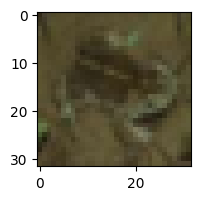

In [47]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

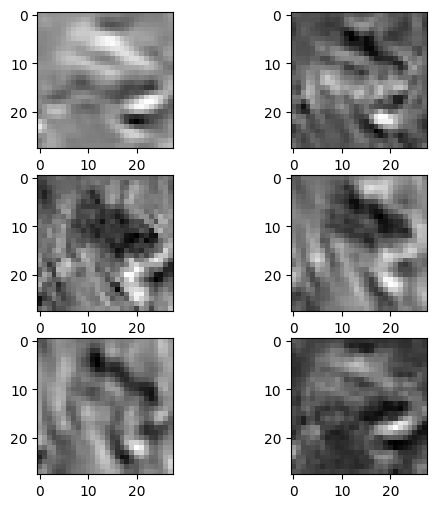

In [48]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Exercises

* Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss
* We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation
* Instead of CIFAR10, use the MNIST data available from `torchvision.datasets.MNIST`. Download and visualise MNIST data.
* But importantly MNIST images have only 1 channel instead of 3 channels in the case of CIFAR10. Modify LeNet to work with MNIST. Train and find optimised test accuracy.